# Logistic Regression on woman's affair dataset
---

**1.1 Loading the dataset**

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline
sns.set()

data = sm.datasets.fair.load_pandas().data
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [2]:
# add another target variable to the data, i.e if the affair rate is > 0, then the woman had an affair(1), else no affair(0)
# 1 = Had an affair
# 0 = No affair
data['had_affair'] = (data.affairs > 0).astype(int)
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,had_affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


---
**1.2: Dataset Information**

**Extramarital affair data is used to explain the allocation of an individual’s time among work, time spent with a spouse, and time spent with a paramour. The data is used as an example of regression with censored data. It was derived from a survey of women in 1974 by Redbook magazine, in which married women were asked about their participation in extramarital affairs.**

**It was derived from a survey of women in 1974 by Redbook magazine, in which married women were asked about their participation in extramarital affairsDescription of Variables
The dataset contains 6366 observations of 9 variables:**

**Dataset description:**

* rate_marriage: woman's rating of her marriage (1 = very poor, 5 = very good)
* age: woman's age
* yrs_married: number of years married
* children: number of children
* religious: woman's rating of how religious she is (1 = not religious, 4 = strongly religious)
* educ: level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree)
* occupation: woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 = "white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)
* occupation_husb: husband's occupation (same coding as above)
* affairs: time spent in extra-marital affairs


---
**1.3 Data Preprocessing**

In [3]:
# check of any null values
# The data is comprised of categorical and numerical features

data.isnull().sum() # no blank data

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
had_affair         0
dtype: int64

In [4]:
# check if data is balanced
data['had_affair'].value_counts()

0    4313
1    2053
Name: had_affair, dtype: int64

---
**1.4 Exploratory Data Analyis**

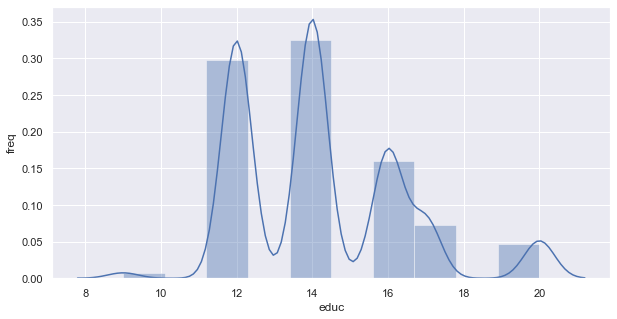

In [5]:
# check what is the average education level of the women in the dataset
plt.figure(figsize=(10,5))
sns.distplot(data['educ'], bins=10)
plt.ylabel("freq")
plt.show()

* Most of the women are eduated at high school level(12) and some college exp(14)

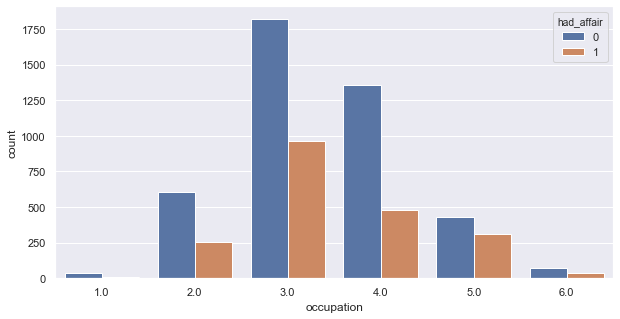

In [6]:
# check woman's occupation based on their affair status
plt.figure(figsize=(10,5))
sns.countplot(x='occupation', data=data, hue='had_affair')

* Women who are into white collar jobs are more into affairs, however, the same category has higher no affair numbers. This could be due to unbalanced data

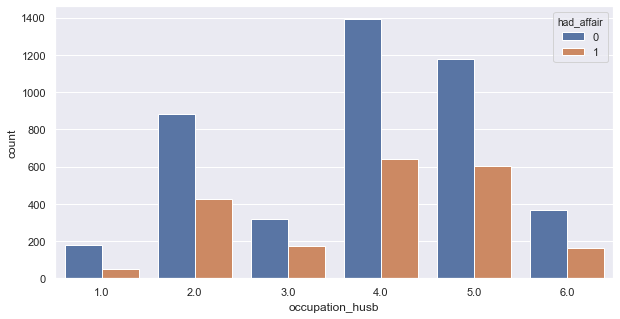

In [7]:
# check if woman's husband occupation has any affect on their affair status
plt.figure(figsize=(10,5))
sns.countplot(x='occupation_husb', data=data, hue='had_affair')

* Husbands who are into teacher/skilled(4) and even manager/businees level(5) jobs have higher affair cases.

In [8]:
data.groupby('had_affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
had_affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


* The average rating of marriage is more for their marriage with woman having no affairs. This is as per expected behavior

In [9]:
# marraiage rating variable
data.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,had_affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


* There is clear postive correlation between yrs_married, children, age with target variable

---
**1.5: Modelling**

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = data.iloc[:, :-1]
Y = data['had_affair']

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)

model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\sanjayc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
# model accuracy on train data
model.score(x_train, y_train) # 97% accuracy

0.9785938727415554

In [26]:
# check prediction of test data
predict = model.predict(x_test)

In [28]:
# model evaluation
from sklearn.metrics import accuracy_score, roc_auc_score

print(accuracy_score(y_test, predict)*100) # 97% accuracy similar to train accuracy

97.69633507853403


In [30]:
# confusion matric
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predict)

# type 1 and type 2 are less

array([[1307,    0],
       [  44,  559]], dtype=int64)

In [35]:
#evaluate the model using cross validation using accuracy
from sklearn.model_selection import cross_val_score

_scores = cross_val_score(estimator=LogisticRegression(), X=X, y=Y, scoring='accuracy', cv=7)
print(_scores)
print(_scores.mean())

C:\Users\sanjayc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sanjayc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sanjayc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sanjayc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sanjayc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

[0.9791438  0.97582418 0.97469747 0.97909791 0.97469747 0.97689769
 0.98239824]
0.9775366789608876


* The average accuracy is around 97% which is similar to train and test data.